## Final Project Submission

Please fill out:
* Student name: AGNES CHOMBA
* Student pace: Part Time
* Scheduled project review date/time: 29/04/2025
* Instructor name: MARYANN MWIKALI
* Blog post URL:


#  Aircraft Risk Analysis for Investment Decisions

## Problem Statement

The organization is planning to diversify its portfolio by entering the aviation industry through the purchase of aircraft for commercial and private use. While this offers new growth opportunities, it also introduces substantial risks.Hence, a thorough risk assessment is required to ensure the investment is viable and sustainable.

## Project Goal
To indetify the aircraft with the lowest risk for company to venture in.

# Data Source and Data Exploration

The data comes from a kaggle from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

The columns used in this project include:





In [37]:
# Your code here - remember to use markdown cells for comments as well!
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df= pd.read_csv('Data/Aviation_Data.csv', index_col=0)
df.head()

c:\Users\Administrator\anaconda31\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
Event.Id,,,,,,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Fatal(3),...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 20001218X45444 to 20221230106513
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Latitude                34382 non-null  object 
 6   Longitude               34373 non-null  object 
 7   Airport.Code            50249 non-null  object 
 8   Airport.Name            52790 non-null  object 
 9   Injury.Severity         87889 non-null  object 
 10  Aircraft.damage         85695 non-null  object 
 11  Aircraft.Category       32287 non-null  object 
 12  Registration.Number     87572 non-null  object 
 13  Make                    88826 non-null  object 
 14  Model                

In [40]:
# List of relevant columns for the risk assessment
relevant_columns = [
    'Investigation.Type', 'Accident.Number', 'Event.Date', 'Injury.Severity', 'Aircraft.damage',
    'Aircraft.Category', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type',
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Weather.Condition',
    'Broad.phase.of.flight', 'Purpose.of.flight', 'Total.Uninjured'
]

In [41]:
filtered_df = df[relevant_columns]
# Filter out rows with missing values in the relevant columns
filtered_df.head()

,Investigation.Type,Accident.Number,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Weather.Condition,Broad.phase.of.flight,Purpose.of.flight,Total.Uninjured
Event.Id,,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,2.0,0.0,UNK,Cruise,Personal,0.0
20001218X45447,Accident,LAX94LA336,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,UNK,Unknown,Personal,0.0
20061025X01555,Accident,NYC07LA005,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,3.0,NaN,IMC,Cruise,Personal,NaN
20001218X45448,Accident,LAX96LA321,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,2.0,0.0,IMC,Cruise,Personal,0.0
20041105X01764,Accident,CHI79FA064,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,1.0,2.0,VMC,Approach,Personal,0.0


In [42]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90348 entries, 20001218X45444 to 20221230106513
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      90348 non-null  object 
 1   Accident.Number         88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Injury.Severity         87889 non-null  object 
 4   Aircraft.damage         85695 non-null  object 
 5   Aircraft.Category       32287 non-null  object 
 6   Make                    88826 non-null  object 
 7   Model                   88797 non-null  object 
 8   Number.of.Engines       82805 non-null  float64
 9   Engine.Type             81812 non-null  object 
 10  Total.Fatal.Injuries    77488 non-null  float64
 11  Total.Serious.Injuries  76379 non-null  float64
 12  Weather.Condition       84397 non-null  object 
 13  Broad.phase.of.flight   61724 non-null  object 
 14  Purpose.of.flight    

In [43]:
#Check missing value count
print(df[relevant_columns].isnull().sum())

Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Make                       1522
Model                      1551
Number.of.Engines          7543
Engine.Type                8536
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Weather.Condition          5951
Broad.phase.of.flight     28624
Purpose.of.flight          7651
Total.Uninjured            7371
dtype: int64


The Aircraft category has a total of 58061 rows with missing values hence it's better to drop it

This is a for-loop that iterates over a list of column names. The columns listed inside the square brackets are the ones we want to fill the missing values (i.e., NaN values) for.

These columns represent categories (like Injury.Severity, Aircraft.damage, etc.), so it's often appropriate to replace missing values with the mode — the most frequent value in the column.

df[col]:
This accesses the DataFrame df and gets the specific column named col (which is dynamically set as the

In [44]:
def clean_aviation_data(df):
    # Drop rows with critical missing values
    df = df.dropna(subset=['Accident.Number', 'Event.Date', 'Make', 'Model'])

    # Fill categorical columns with mode (most frequent value)
    categorical_cols = [
        'Injury.Severity', 'Aircraft.damage', 'Engine.Type',
        'Weather.Condition', 'Broad.phase.of.flight', 'Purpose.of.flight'
    ]
    for col in categorical_cols:
        if col in df.columns and not df[col].mode().empty:  # Safe check if column exists and mode is not empty
            df[col] = df[col].fillna(df[col].mode()[0])

    # Fill numerical columns
    if 'Number.of.Engines' in df.columns and not df['Number.of.Engines'].median() is None:
        df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())

    numerical_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Uninjured']
    for col in numerical_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0)

    # Drop Aircraft.Category if it exists
    if 'Aircraft.Category' in df.columns:
        df = df.drop(columns=['Aircraft.Category'])

    return df


In [45]:
df = clean_aviation_data(filtered_df)
df.head()

<ipython-input-44-2a6d56ba32a7>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])
<ipython-input-44-2a6d56ba32a7>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number.of.Engines'] = df['Number.of.Engines'].fillna(df['Number.of.Engines'].median())
<ipython-input-44-2a6d56ba32a7>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

,Investigation.Type,Accident.Number,Event.Date,Injury.Severity,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Weather.Condition,Broad.phase.of.flight,Purpose.of.flight,Total.Uninjured
Event.Id,,,,,,,,,,,,,,,
20001218X45444,Accident,SEA87LA080,1948-10-24,Fatal(2),Destroyed,Stinson,108-3,1.0,Reciprocating,2.0,0.0,UNK,Cruise,Personal,0.0
20001218X45447,Accident,LAX94LA336,1962-07-19,Fatal(4),Destroyed,Piper,PA24-180,1.0,Reciprocating,4.0,0.0,UNK,Unknown,Personal,0.0
20061025X01555,Accident,NYC07LA005,1974-08-30,Fatal(3),Destroyed,Cessna,172M,1.0,Reciprocating,3.0,0.0,IMC,Cruise,Personal,0.0
20001218X45448,Accident,LAX96LA321,1977-06-19,Fatal(2),Destroyed,Rockwell,112,1.0,Reciprocating,2.0,0.0,IMC,Cruise,Personal,0.0
20041105X01764,Accident,CHI79FA064,1979-08-02,Fatal(1),Destroyed,Cessna,501,1.0,Reciprocating,1.0,2.0,VMC,Approach,Personal,0.0


In [46]:
# Show duplicate rows
#duplicates =df[df.duplicated()]
#print(duplicates)

In [47]:
#df.drop_duplicates(subset=None, keep='first', inplace=False)

In [48]:
df.info()
# Check for duplicates again

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 20001218X45444 to 20221230106513
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88777 non-null  object 
 1   Accident.Number         88777 non-null  object 
 2   Event.Date              88777 non-null  object 
 3   Injury.Severity         88777 non-null  object 
 4   Aircraft.damage         88777 non-null  object 
 5   Make                    88777 non-null  object 
 6   Model                   88777 non-null  object 
 7   Number.of.Engines       88777 non-null  float64
 8   Engine.Type             88777 non-null  object 
 9   Total.Fatal.Injuries    88777 non-null  float64
 10  Total.Serious.Injuries  88777 non-null  float64
 11  Weather.Condition       88777 non-null  object 
 12  Broad.phase.of.flight   88777 non-null  object 
 13  Purpose.of.flight       88777 non-null  object 
 14  Total.Uninjured      

In [49]:
df.describe()


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Uninjured
count,88777.000000,88777.000000,88777.000000,88777.000000
mean,1.136646,0.564493,0.240445,4.968145
std,0.432725,5.129247,1.434944,27.003094
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,699.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88777 entries, 20001218X45444 to 20221230106513
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Investigation.Type      88777 non-null  object 
 1   Accident.Number         88777 non-null  object 
 2   Event.Date              88777 non-null  object 
 3   Injury.Severity         88777 non-null  object 
 4   Aircraft.damage         88777 non-null  object 
 5   Make                    88777 non-null  object 
 6   Model                   88777 non-null  object 
 7   Number.of.Engines       88777 non-null  float64
 8   Engine.Type             88777 non-null  object 
 9   Total.Fatal.Injuries    88777 non-null  float64
 10  Total.Serious.Injuries  88777 non-null  float64
 11  Weather.Condition       88777 non-null  object 
 12  Broad.phase.of.flight   88777 non-null  object 
 13  Purpose.of.flight       88777 non-null  object 
 14  Total.Uninjured      

In [51]:
# Apply the same text case to all string columns
string_columns = df.select_dtypes(include=['object']).columns
for col in string_columns:
    df[col] = df[col].str.lower().str.strip()


In [68]:
df.to_csv('cleaned_aviation_data.csv', index=False)

# Data Analysis & Visualization

In [53]:
# group by aircraft make and Investigation.Type
df.groupby(['Make', 'Investigation.Type']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).head(10)

,Make,Investigation.Type,counts
1301,cessna,accident,26789
5409,piper,accident,14683
658,beech,accident,5176
680,bell,accident,2662
855,boeing,incident,1379
854,boeing,accident,1359
4876,mooney,accident,1311
5905,robinson,accident,1218
2940,grumman,accident,1158
713,bellanca,accident,1040


Cessna aircraft have the highest number of recorded accidents, while aircraft manufactured by Bellanca have the lowest. This suggests that Bellanca aircraft may present the lowest risk of being involved in an accident. Only Boeing has the incident cases of 1379

In [54]:
df.groupby(['Make', 'Investigation.Type'])[['Total.Fatal.Injuries', 'Total.Uninjured']].sum() \
   .reset_index() \
   .assign(counts=lambda x: x['Total.Fatal.Injuries'] + x['Total.Uninjured']) \
   .sort_values(by='Total.Fatal.Injuries', ascending=False) \
   .head(10)


,Make,Investigation.Type,Total.Fatal.Injuries,Total.Uninjured,counts
1301,cessna,accident,9635.0,32582.0,42217.0
854,boeing,accident,8746.0,100276.0,109022.0
5409,piper,accident,6681.0,16869.0,23550.0
658,beech,accident,3779.0,6760.0,10539.0
680,bell,accident,1330.0,2841.0,4171.0
183,airbus,accident,1325.0,12150.0,13475.0
4603,mcdonnell douglas,accident,1286.0,19795.0,21081.0
191,airbus industrie,accident,1174.0,9535.0,10709.0
2027,douglas,accident,983.0,3164.0,4147.0
4876,mooney,accident,685.0,1219.0,1904.0


In [55]:
summary = (
    df.groupby(['Make', 'Investigation.Type'])
      .agg(
          counts=('Total.Uninjured', 'sum'),                         # Count of accidents
          Total_Fatal_Injuries=('Total.Fatal.Injuries', 'sum'),  # Sum of fatal injuries
          Total_Uninjured=('Total.Uninjured', 'sum')           # Sum of uninjured
      )
      .reset_index()
      .sort_values(by='counts', ascending=False)   # Sort by accident count
)

# Display the top 10
summary.head(10)

,Make,Investigation.Type,counts,Total_Fatal_Injuries,Total_Uninjured
855,boeing,incident,108092.0,2.0,108092.0
854,boeing,accident,100276.0,8746.0,100276.0
1301,cessna,accident,32582.0,9635.0,32582.0
4604,mcdonnell douglas,incident,25307.0,0.0,25307.0
4603,mcdonnell douglas,accident,19795.0,1286.0,19795.0
5409,piper,accident,16869.0,6681.0,16869.0
183,airbus,accident,12150.0,1325.0,12150.0
192,airbus industrie,incident,11726.0,0.0,11726.0
191,airbus industrie,accident,9535.0,1174.0,9535.0
184,airbus,incident,9111.0,0.0,9111.0


In [56]:
# mode by make, Aircraft damage and Phase of flight

nested_mode = (
    df.groupby(['Make', 'Aircraft.damage','Investigation.Type'])
      .agg({
          'Broad.phase.of.flight': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'
      })
      .reset_index()
)

nested_mode.head(10)



,Make,Aircraft.damage,Investigation.Type,Broad.phase.of.flight
0,107.5 flying corporation,destroyed,accident,landing
1,1200,substantial,accident,maneuvering
2,177mf llc,substantial,accident,landing
3,1977 colfer-chan,substantial,accident,landing
4,1st ftr gp,destroyed,accident,maneuvering
5,2000 mccoy,destroyed,accident,cruise
6,2001 mcgirl,destroyed,accident,approach
7,2003 nash,substantial,accident,cruise
8,2007 savage air llc,minor,incident,landing
9,2021fx3 llc,substantial,accident,landing


In [57]:
#print(df.describe(include='object'))

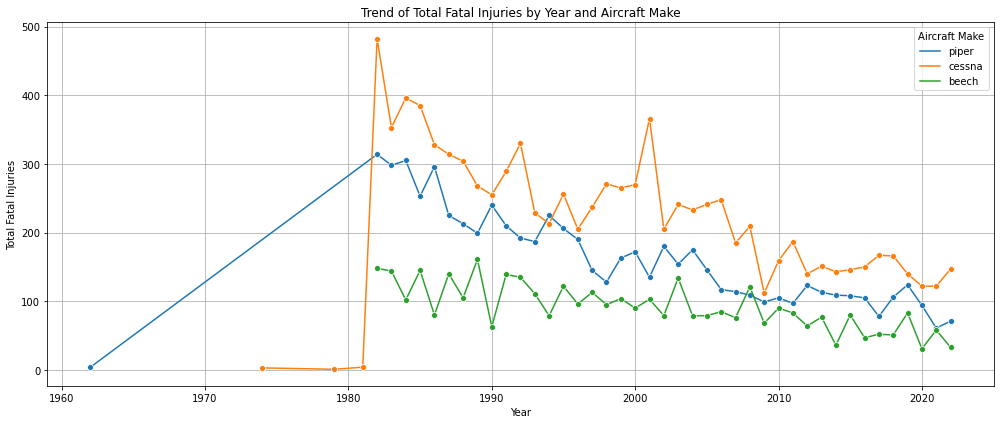

In [58]:
# Convert Event.Date to datetime and extract year
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Year'] = df['Event.Date'].dt.year

# Group by Year and Make, summing the total fatal injuries
injury_trend = df.groupby(['Year', 'Make'])['Total.Fatal.Injuries'].sum().reset_index()

# Filter for top 5 most frequent makes (optional for clearer plotting)
top_makes = df['Make'].value_counts().nlargest(3).index
injury_trend = injury_trend[injury_trend['Make'].isin(top_makes)]

# Plot the trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=injury_trend, x='Year', y='Total.Fatal.Injuries', hue='Make', marker='o')
plt.title('Trend of Total Fatal Injuries by Year and Aircraft Make')
plt.xlabel('Year')
plt.ylabel('Total Fatal Injuries')
plt.legend(title='Aircraft Make')
plt.grid(True)
plt.tight_layout()
plt.show()

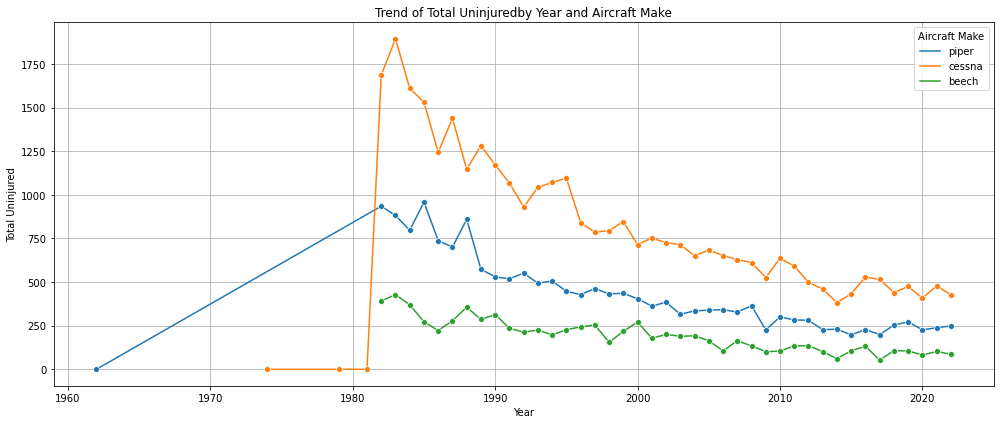

In [59]:
# Convert Event.Date to datetime and extract year
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Year'] = df['Event.Date'].dt.year

# Group by Year and Make, summing the total fatal injuries
injury_trend = df.groupby(['Year', 'Make'])['Total.Uninjured'].sum().reset_index()

# Filter for top 5 most frequent makes (optional for clearer plotting)
top_makes = df['Make'].value_counts().nlargest(3).index
injury_trend = injury_trend[injury_trend['Make'].isin(top_makes)]

# Plot the trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=injury_trend, x='Year', y='Total.Uninjured', hue='Make', marker='o')
plt.title('Trend of Total Uninjuredby Year and Aircraft Make')
plt.xlabel('Year')
plt.ylabel('Total Uninjured')
plt.legend(title='Aircraft Make')
plt.grid(True)
plt.tight_layout()
plt.show()

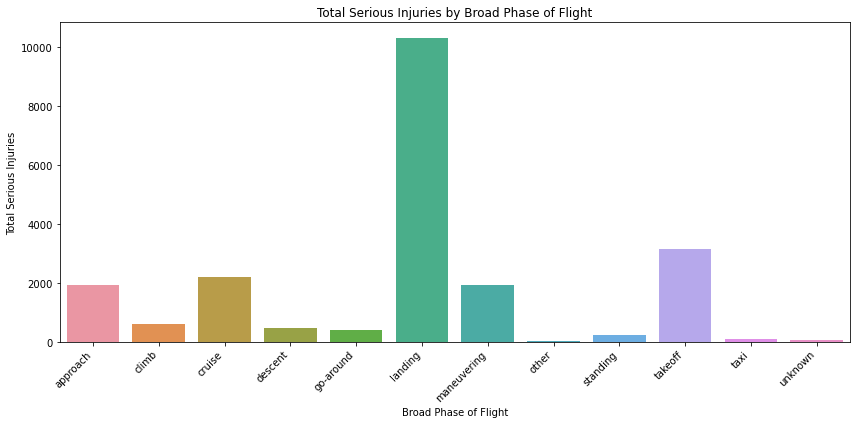

In [69]:
# Plotting the distribution of Total Fatal Injuries
phase_fatalities = df.groupby('Broad.phase.of.flight')['Total.Serious.Injuries'].sum().reset_index()

# Then plot
plt.figure(figsize=(12,6))
sns.barplot(data=phase_fatalities, x='Broad.phase.of.flight', y='Total.Serious.Injuries')
plt.xticks(rotation=45, ha='right')
plt.title('Total Serious Injuries by Broad Phase of Flight')
plt.ylabel('Total Serious Injuries')
plt.xlabel('Broad Phase of Flight')
plt.tight_layout()
plt.show()